In [1]:
from google.colab import files
files=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
#importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [3]:
train_df = pd.read_csv('/content/train.csv', index_col="S.No")
test_df = pd.read_csv('/content/test.csv', index_col="S.No")

In [4]:
print(train_df)
print(test_df)

             lat       lon        TMQ  ...       ZBOT      time  LABELS
S.No                                   ...                             
0     -24.758801  242.1875  16.019615  ...  64.372635  20030804       0
1      23.820078  277.8125  47.802036  ...  66.834389  20071006       1
2      23.820078  276.8750  11.556691  ...  64.209663  20020331       0
3      13.494133  253.1250  53.186630  ...  66.243294  20000906       0
4     -24.524120  241.2500  23.353998  ...  64.876427  20000906       0
...          ...       ...        ...  ...        ...       ...     ...
47755 -30.625815  353.4375  14.680613  ...  63.678669  20001106       2
47756 -24.993481  242.1875  29.540585  ...  65.238327  20010712       2
47757 -30.625815  353.4375  20.991110  ...  63.929737  20011029       0
47758  23.585398  276.5625  45.689816  ...  66.656548  20020712       0
47759  24.054759  276.8750  49.550251  ...  66.221062  20081012       0

[47760 rows x 20 columns]
            lat       lon        TMQ 

In [5]:
print(train_df.shape)
print(test_df.shape)

(47760, 20)
(7320, 19)


In [6]:
print(train_df.columns)
print(test_df.columns)

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'time', 'LABELS'],
      dtype='object')
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'time'],
      dtype='object')


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,47760.0,-2.933507e+00,2.290675e+01,-3.109518e+01,-2.458279e+01,-3.872229e+00,2.176662e+01,2.405476e+01
lon,47760.0,2.692708e+02,4.104659e+01,2.290625e+02,2.418750e+02,2.531250e+02,2.771875e+02,3.543750e+02
TMQ,47760.0,3.483568e+01,1.286955e+01,6.960679e+00,2.403308e+01,3.489657e+01,4.472710e+01,8.064136e+01
U850,47760.0,-6.202928e-01,6.847307e+00,-5.880523e+01,-5.507042e+00,-1.671802e+00,3.621788e+00,3.227734e+01
V850,47760.0,1.040469e-02,4.332385e+00,-2.621691e+01,-2.307535e+00,1.571722e-01,2.341779e+00,5.806025e+01
UBOT,47760.0,-2.152124e+00,6.043284e+00,-5.826048e+01,-6.589128e+00,-2.687853e+00,1.720815e+00,3.021539e+01
VBOT,47760.0,-7.594555e-01,4.761139e+00,-2.076045e+01,-3.800056e+00,-7.749922e-01,2.072186e+00,3.110628e+01
QREFHT,47760.0,1.437782e-02,3.969209e-03,4.363584e-03,1.124537e-02,1.456635e-02,1.798656e-02,2.236619e-02
PS,47760.0,1.015541e+05,5.458636e+02,9.661160e+04,1.011521e+05,1.015280e+05,1.018875e+05,1.039970e+05
PSL,47760.0,1.015563e+05,5.448553e+02,9.661160e+04,1.011576e+05,1.015312e+05,1.018889e+05,1.039970e+05


In [8]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,7320.0,-2.933507e+00,2.290808e+01,-3.109518e+01,-2.458279e+01,-3.872229e+00,2.176662e+01,2.405476e+01
lon,7320.0,2.692708e+02,4.104896e+01,2.290625e+02,2.418750e+02,2.531250e+02,2.771875e+02,3.543750e+02
TMQ,7320.0,3.619033e+01,1.405282e+01,1.017640e+01,2.373332e+01,3.620271e+01,4.840228e+01,6.949065e+01
U850,7320.0,-5.378949e-01,7.520631e+00,-3.560724e+01,-5.287402e+00,-1.184733e+00,3.720756e+00,2.233442e+01
V850,7320.0,5.343088e-01,4.363787e+00,-1.217288e+01,-2.354917e+00,5.286913e-01,2.938113e+00,1.529989e+01
UBOT,7320.0,-2.091177e+00,6.831562e+00,-2.722495e+01,-7.204344e+00,-2.510036e+00,2.249489e+00,1.722136e+01
VBOT,7320.0,-8.481899e-02,4.968153e+00,-1.641806e+01,-3.542063e+00,-2.708225e-01,3.396452e+00,1.632359e+01
QREFHT,7320.0,1.443893e-02,4.420418e-03,5.218535e-03,1.088273e-02,1.414398e-02,1.884807e-02,2.223912e-02
PS,7320.0,1.015728e+05,6.117430e+02,9.995482e+04,1.010652e+05,1.015505e+05,1.019987e+05,1.030886e+05
PSL,7320.0,1.015751e+05,6.103027e+02,9.995482e+04,1.010682e+05,1.015524e+05,1.019987e+05,1.030886e+05


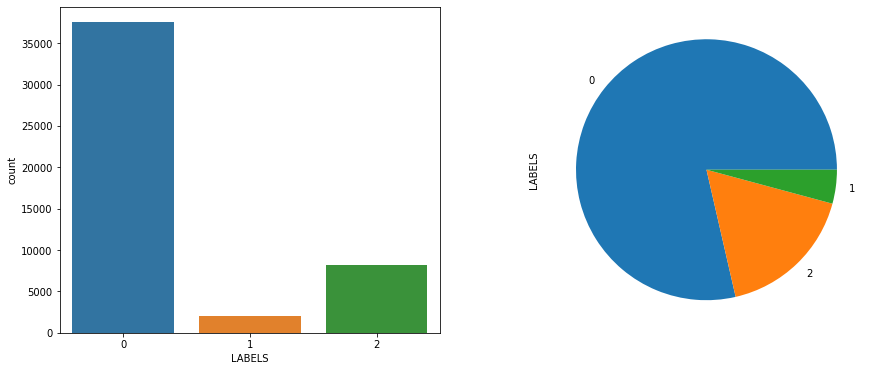

In [9]:
#checking the ratios of 0s, 1s and 2s in the train dataset
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='LABELS', data=train_df, ax=ax[0])
_ = train_df['LABELS'].value_counts().plot.pie(ax=ax[1])

In [10]:
#checking if there is any null values present
print(train_df.isnull().sum())

lat       0
lon       0
TMQ       0
U850      0
V850      0
UBOT      0
VBOT      0
QREFHT    0
PS        0
PSL       0
T200      0
T500      0
PRECT     0
TS        0
TREFHT    0
Z1000     0
Z200      0
ZBOT      0
time      0
LABELS    0
dtype: int64


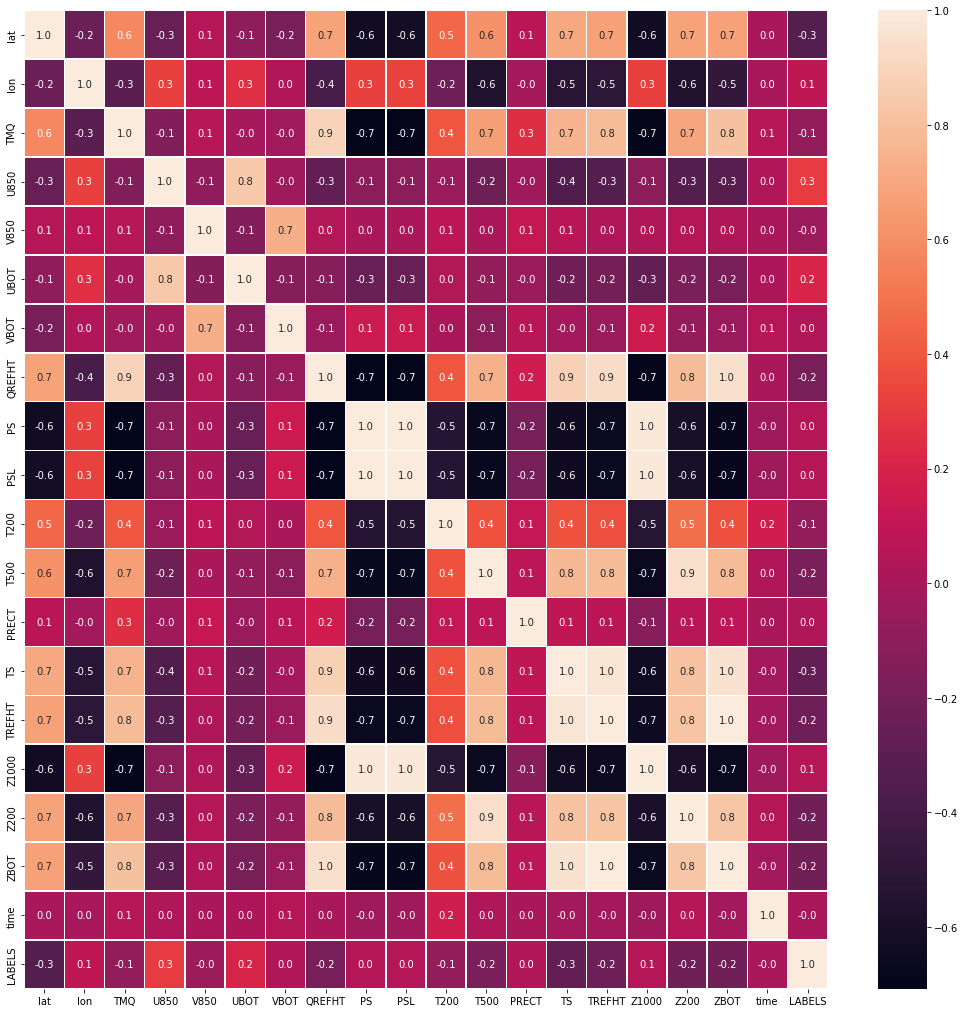

In [11]:
#heatmap 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [12]:
#splitting the train dataset 
X = train_df.iloc[:, :-1]
Y = train_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [13]:
#KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
knn_predictions = knn_classifier.predict(x_test)
knn_predictions_test = knn_classifier.predict(test_df)

print("The accuracy in general is : ", accuracy_score(y_test,knn_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,knn_predictions))

The accuracy in general is :  0.8782453936348409


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      7561
           1       0.72      0.70      0.71       351
           2       0.71      0.68      0.69      1640

    accuracy                           0.88      9552
   macro avg       0.78      0.77      0.78      9552
weighted avg       0.88      0.88      0.88      9552



In [14]:
#Logistic Regression using scikit Learn
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(x_train, y_train)

logreg_predictions = logreg_classifier.predict(x_test)
logreg_predictions_test = logreg_classifier.predict(test_df)

print("The accuracy in general is : ", accuracy_score(y_test,logreg_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,logreg_predictions))


The accuracy in general is :  0.7915619765494137


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      7561
           1       0.00      0.00      0.00       351
           2       0.00      0.00      0.00      1640

    accuracy                           0.79      9552
   macro avg       0.26      0.33      0.29      9552
weighted avg       0.63      0.79      0.70      9552



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy in general is :  0.8600293132328308


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      7561
           1       0.65      0.66      0.66       351
           2       0.66      0.64      0.65      1640

    accuracy                           0.86      9552
   macro avg       0.74      0.74      0.74      9552
weighted avg       0.86      0.86      0.86      9552



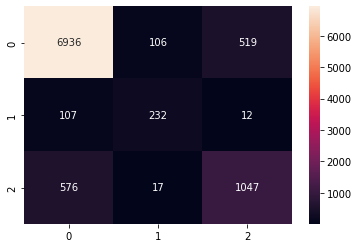

In [15]:
# Random Forest

rf_classifier = RandomForestClassifier(random_state=43)      
rf_classifier = rf_classifier.fit(x_train,y_train)

rf_predictions = rf_classifier.predict(x_test)
rf_predictions_test = rf_classifier.predict(test_df)

print("The accuracy in general is : ", accuracy_score(y_test,rf_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,rf_predictions))

cm = confusion_matrix(y_test,rf_classifier.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [16]:
# find best scored 5 features
best_feature = SelectKBest(score_func=f_classif, k=5).fit(x_train,y_train )

In [17]:
print('Score list:', best_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [3907.02873235  264.97179084 2269.60875254 1974.55790029  325.86920307
  909.80820017  111.97145095 2187.35928785 2692.07965329 2697.9944414
 1346.26125016 1869.31256785  425.99293848 2514.84013511 2120.18193433
 1969.86702874 2025.63265299 2104.98569098   40.47699683]
Feature list: Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'time'],
      dtype='object')


The accuracy in general is :  0.8519681742043551


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7561
           1       0.63      0.59      0.61       351
           2       0.65      0.60      0.63      1640

    accuracy                           0.85      9552
   macro avg       0.73      0.70      0.72      9552
weighted avg       0.85      0.85      0.85      9552



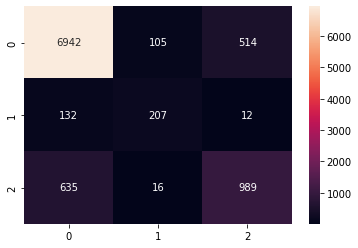

In [19]:
x_train_2 = best_feature.transform(x_train)
x_test_2 = best_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)

print("The accuracy in general is : ", accuracy_score(y_test,clf_rf_2.predict(x_test_2)))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,clf_rf_2.predict(x_test_2)))
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [20]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rf_classifier_3 = RandomForestClassifier()      
rfe = RFE(estimator=rf_classifier_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [21]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['U850', 'VBOT', 'PS', 'TS', 'Z200'], dtype='object')


In [22]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
rf_classifier_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=rf_classifier_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['lat', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'PS', 'PSL', 'T200',
       'T500', 'TS', 'TREFHT', 'Z200', 'time'],
      dtype='object')


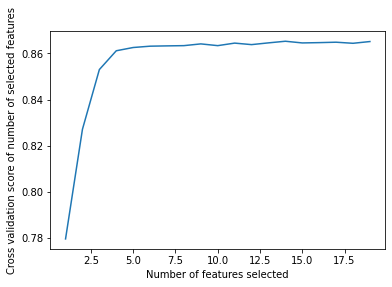

In [23]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 3 (0.100208)
2. feature 5 (0.066203)
3. feature 0 (0.064946)
4. feature 16 (0.064251)
5. feature 9 (0.062641)
6. feature 6 (0.061700)
7. feature 2 (0.057861)
8. feature 8 (0.056461)
9. feature 15 (0.054251)
10. feature 4 (0.053727)
11. feature 13 (0.052254)
12. feature 10 (0.051387)
13. feature 18 (0.051353)
14. feature 14 (0.049973)
15. feature 17 (0.045719)
16. feature 11 (0.045367)
17. feature 7 (0.039223)
18. feature 1 (0.021500)
19. feature 12 (0.000975)


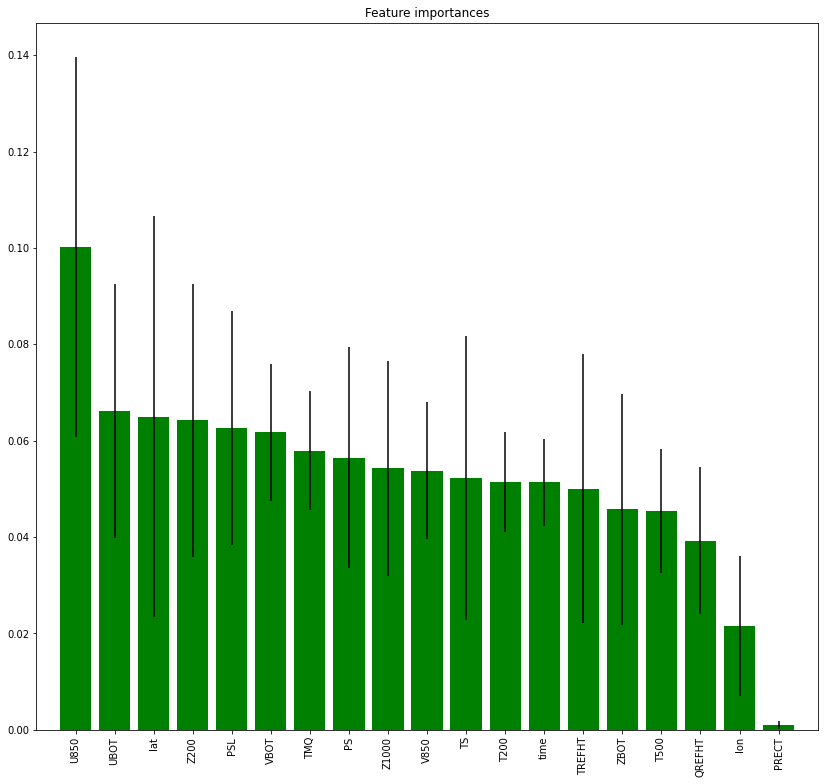

In [26]:
import numpy as np
rf_classifier_5 = RandomForestClassifier()      
rf_classifier_5 = rf_classifier_5.fit(x_train,y_train)
importances = rf_classifier_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [25,50,100]
max_depth = [10,20,30]
min_samples_leaf = [2,4,6,8]
bootstrap = [True, False]
max_features= [5,10,15,18]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
    "max_features": max_features,
}

rf = RandomForestClassifier(random_state=42)

rf_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, verbose=10, n_jobs=-1)
rf_model.fit(x_train_2, y_train)

print("Using hyperparameters --> \n", rf_model.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1908s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1357s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (3.3952s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 127 tasks      | elapsed:  

In [28]:
rf_model.best_params_
rf_model.best_score_
rf_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

rf.fit(x_train_2, y_train)

y_predict_train_rf = rf.predict(x_train_2)
print(x_test.shape)
x_test_new = x_test[['U850', 'VBOT', 'PS', 'TS', 'Z200']]
y_predict_test_rf = rf.predict(x_test_new)
test_df_new = test_df[['U850', 'VBOT', 'PS', 'TS', 'Z200']]
y_predict_test_rf_test = rf.predict(test_df_new)

#print(y_predict_test_rf_test)
train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

print(classification_report(y_train, y_predict_train_rf))

(9552, 19)
0.9078465242881072
0.7915619765494137
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     29974
           1       0.84      0.69      0.76      1651
           2       0.84      0.70      0.76      6583

    accuracy                           0.91     38208
   macro avg       0.87      0.79      0.82     38208
weighted avg       0.90      0.91      0.90     38208



In [30]:
# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':y_predict_test_rf_test})
# filename = 'Submission_Abhay_RF_V10.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)

In [31]:
#xgboost
from xgboost import XGBClassifier
params = {
            'objective':'multi:softmax',
            'max_depth': 10,
            'alpha': 20,
            'learning_rate': 0.05,
            'n_estimators':100,
            'scale_pos_weight':1}    

xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=20, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
# print(x_test)
y_pred = xgb_clf.predict(x_test)
y_pred_test = xgb_clf.predict(test_df)

In [33]:
import numpy as np
n_zeros = np.count_nonzero(y_pred_test==0)
# display the count of zeros
print(n_zeros)

6008


In [34]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8821


In [35]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The classification report is as follows:\n", classification_report(y_test,y_pred))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7561
           1       0.70      0.66      0.68       351
           2       0.75      0.66      0.70      1640

    accuracy                           0.88      9552
   macro avg       0.79      0.75      0.77      9552
weighted avg       0.88      0.88      0.88      9552



In [36]:
import lightgbm as lgb
lgbm_tuned = lgb.LGBMClassifier(
                            learning_rate=0.05, 
                            max_depth=10, 
                            n_estimators=500, 
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(x_train, y_train) #Fit the model with the optimum parameters

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.05, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
y_test_pred = lgbm_tuned.predict(x_test) #Predicting X_test to find the solutiın
y_test_pred1= lgbm_tuned.predict(test_df)
score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)

0.884


In [38]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_test,y_test_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,y_test_pred))

The accuracy in general is :  0.8843174204355109


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7561
           1       0.68      0.67      0.68       351
           2       0.75      0.67      0.71      1640

    accuracy                           0.88      9552
   macro avg       0.78      0.76      0.77      9552
weighted avg       0.88      0.88      0.88      9552



In [39]:
import numpy as np
print(y_test_pred1)
n_zeros = np.count_nonzero(y_test_pred1==2)
# display the count of zeros
print(n_zeros)

[0 0 0 ... 1 1 1]
376


In [40]:
# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':y_test_pred1})
# print(submission.LABELS)


# filename = 'Submission_Abhay_Scratch_LGBM_10.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [25,50,100]
max_depth = [10,20,30]
min_samples_leaf = [2,4,6,8]
lr = [0.01]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
    "max_features": max_features,
    "lr": lr
}
xgb = XGBClassifier(random_state=42)

xgb_model = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=2, verbose=10, n_jobs=-1)
xgb_model.fit(x_train, y_train)

print("Using hyperparameters --> \n", xgb_model.best_params_)

Fitting 2 folds for each of 1152 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 29

In [41]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(x_train, y_train)
snn_predictions = snn_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(x_train, y_train)
dnn_predictions = dnn_classifier.predict(x_test)

In [44]:
print("The accuracy in general is : ", accuracy_score(y_test,dnn_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,dnn_predictions))

The accuracy in general is :  0.7915619765494137


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      7561
           1       0.00      0.00      0.00       351
           2       0.00      0.00      0.00      1640

    accuracy                           0.79      9552
   macro avg       0.26      0.33      0.29      9552
weighted avg       0.63      0.79      0.70      9552



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(x_train, y_train)
svm_predictions_labels = svm_classifier.predict(x_test)

In [46]:
print("The accuracy in general is : ", accuracy_score(y_test,svm_predictions_labels))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,svm_predictions_labels))

The accuracy in general is :  0.7915619765494137


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      7561
           1       0.00      0.00      0.00       351
           2       0.00      0.00      0.00      1640

    accuracy                           0.79      9552
   macro avg       0.26      0.33      0.29      9552
weighted avg       0.63      0.79      0.70      9552



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred_test = gnb.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred_test)
print(acc)

0.5824958123953099


In [51]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('ranfor',rf_classifier),('LGBM',lgbm_tuned),('XGBOOST',xgb_clf), ('KNN', knn_classifier)], 
                      voting='soft')
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('ranfor',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
    

In [52]:
y_pred_vc = vc.predict(x_test)
y_pred_vc_1 = vc.predict(test_df)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc))

Confusion Matrix
[[7055   86  420]
 [ 109  235    7]
 [ 554   17 1069]]


Accuracy
0.8751046901172529


In [54]:
# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':y_pred_vc_1})
# print(submission.LABELS)


# filename = 'Submission_Abhay_VotingClassifier_10.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)